Mikkel Højbjerg      -       AU689924    -     17-02-2023

Numerisk Lineær Algebra                        -                          Aarhus Universitet

In [1]:
import matplotlib.pyplot as plt
import numpy as np

(a)

Vælg nogle rimelige værdier for indgangerne i a, b, c og d, og brug derefter matplotlib til at lave en tegning af robot armen

In [2]:
#Laver et array af alle x og y koordinater
x = np.array([0.0, 5.0, 8.0, 9.0, 8.7])
y = np.array([0.0, 6.0, 6.5, 5.5, 4.7])

In [3]:
a = [5.0, 6.0]
b = [3.0, 0.5]
c = [1.0, -1.0]
d = [-0.3, -0.8]

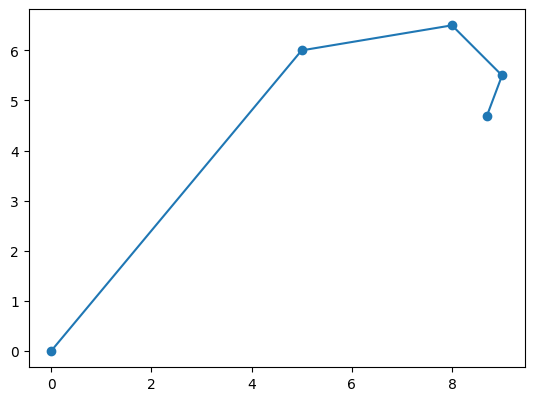

In [4]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(x, y, marker = "o")

(b)

Bestem vektoren OP ud fra a, b, c og d

Findes ved at ligge alle x aksens retninger sammen og y-aksens retninger sammen.

Da armene er lavet via. punkter og ikke vektor (kunne ikke få det til at virke med vektor) tages afstanden af punkterne

In [5]:
OPx = a[0] + b[0] + c[0] + d[0]
OPy = a[1] + b[1] + c[1] + d[1]
OPx, OPy


(8.7, 4.7)

In [6]:
#Så vektoren OP er:
OP = [8.7, 4.7]

(c)

Gør rede for at når armen bøjes i leddet C, svarer det til at advende en rotationsmatrix R_C på d, dvs.

        bøj_c(S) = [ a | b | c | Rcd ].

Lav en matplotlib tegning der viser dette.

In [7]:


R_C = np.array([[np.cos(np.pi/1.5), -np.sin(np.pi/1.5)],
              [np.sin(np.pi/1.5), np.cos(np.pi/1.5)]])
d_r = np.matmul(R_C, d)
xr_c = np.array([x[0], x[1], x[2], x[3], d_r[0] + x[4]])
yr_c = np.array([y[0], y[1], y[2], y[3], d_r[1] + y[4]])

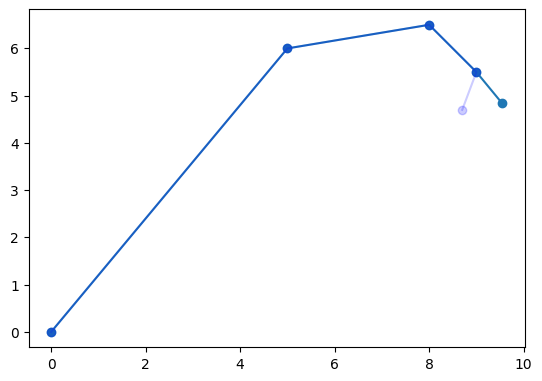

In [8]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(xr_c, yr_c, marker = "o")
ax.plot(x, y, color = "blue", marker = "o", alpha = 0.2)

plt.show()

I graften ovenfor, kan det ses at leddet d bliver roteret ved at på virker vektoren c (eller det der vil svare til vektor c i koordinatsystemet) 

(d)
Giv en opskrift for bøj_A(S), hvor robotarmen bøjes kun i leddet A. Vis dette i en tegning


In [9]:
xr_a = np.array([x[0], x[1], d_r[1] + x[2], d_r[1] + x[3], d_r[1] + x[4]])
yr_a = np.array([y[0], y[1], d_r[0] + y[2], d_r[0] + y[3], d_r[0] + y[4]])

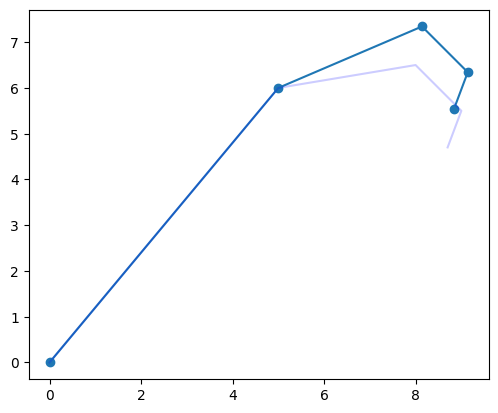

In [10]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(xr_a, yr_a, marker = "o")
ax.plot(x, y, color = "blue", alpha = 0.2)

plt.show()

For at få alle ledede efter vektor a til at følge med når leddet A bøjes, skal resten af leddene efter A også roteres (igen fordi jeg ikke kunne få vektor a, b, c og d vil at virke)

(e)

Vis generelt at 

                    bøj_A(bøj_C(S)) = bøj_C(bøj_A(S)),

dvs. det har ingen betydning for slutstillingen hvilket led vi bøjer først 

Først bliver arrayet fra rotationen i c leddet tilføjet, her bliver de rotationer som bliver brugt i a leddet plusses på de tilsvarende led

In [13]:
ra_rcx = np.array([xr_c[0], xr_c[1], d_r[1] + xr_c[2], d_r[1] + xr_c[3], d_r[1] + xr_c[4]])
ra_rcy = np.array([yr_c[0], yr_c[1], d_r[0] + yr_c[2], d_r[0] + yr_c[3], d_r[0] + yr_c[4]])

NU bliver arrayet fra rotationen i a leddet, her bliver de rotationer som bliver brugt i c leddet plusses på de tilsvarende led

In [17]:
rc_rax = np.array([xr_a[0], xr_a[1], xr_a[2], xr_a[3], d_r[0] + xr_a[4]])
rc_ray = np.array([yr_a[0], yr_a[1], yr_a[2], yr_a[3], d_r[1] + yr_a[4]])

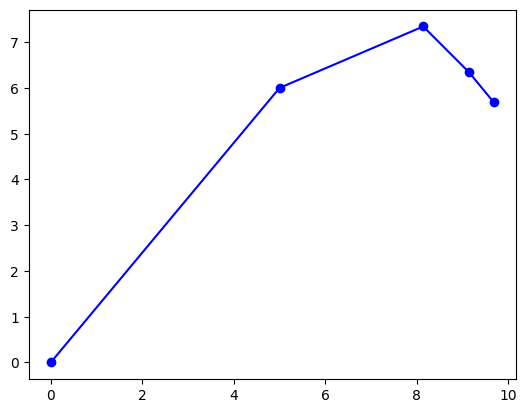

In [18]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(ra_rcx, ra_rcy, color = "blue", marker = "o")

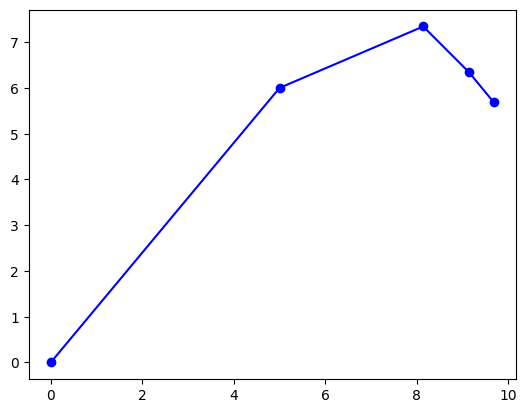

In [19]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(rc_rax, rc_ray, color = "blue", marker = "o")

Det kan ses at de to grafer er identiske, så det betyder ikke noget for slustillingen om man siger:

            bøj_A(bøj_C(S))

Eller

            bøj_C(bøj_A(S))